# OCO2_GEOS_L3_v10r 年尺度CHN-Anomaly生成

In [1]:
import numpy as np
import netCDF4 as nc
import os
from maplot import map_plot_surface_sub, map_plot_surface

inPath = "H:\\XCO2\\OCO2_GEOS_L3_v10r\\src_daily_resample\\"
outPath = "H:\\XCO2\\OCO2_GEOS_L3_v10r\\CHN_year\\"

china = np.load("china_area.npy") > 0.0
filenames = os.listdir(inPath)

H:\preprocessing_code\XCO2\OCO-2\OCO2_GEOS_L3_v10r\maplot.py:62: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)


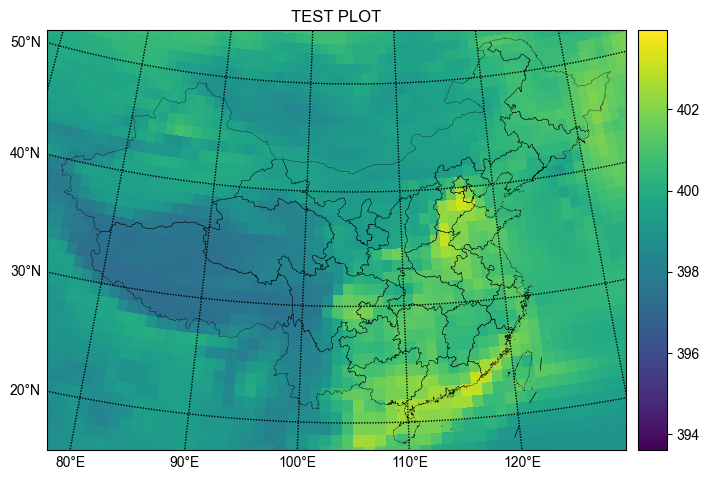

In [11]:
# nc文件读取与绘制测试
test = nc.Dataset(inPath + "oco2_GEOS_L3CO2_day_20150107_B10206Ar.nc4", "r").variables["XCO2"][:].data[0] * 1e6  # 放大为NPP
map_plot_surface(test, 'viridis', None, None, "TEST PLOT", figsize=(8, 8))

In [12]:
def read(name):
    d = nc.Dataset(inPath+name, 'r').variables["XCO2"][:].data[0] * 1e6
    d[~china] = np.NaN
    
    return d

for year in range(2015, 2022):
    year_filenames = [filename for filename in filenames if filename[20:24]==f"{year}"]
    data = np.array([read(f) for f in year_filenames])  # shape: (~365, 180, 360)
    medians = np.broadcast_to(np.nanmedian(data, axis=(1, 2))[:, np.newaxis, np.newaxis], (data.shape[0], 180, 360))
    res = np.nanmean(data - medians, axis=0)
    
    np.save(outPath+f"MappingXCO2_{year}", res)

C:\Users\alzio\AppData\Local\Temp\ipykernel_22960\304363851.py:11: RuntimeWarning: Mean of empty slice
  res = np.nanmean(data - medians, axis=0)


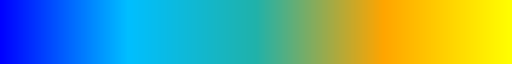

In [13]:
from matplotlib.colors import LinearSegmentedColormap

linearColors = LinearSegmentedColormap.from_list("myColors", ["blue", "deepskyblue", "lightseagreen", "orange", "yellow"], N=600)
linearColors

H:\preprocessing_code\XCO2\OCO-2\OCO2_GEOS_L3_v10r\maplot.py:92: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_GEOS_L3_v10r\maplot.py:92: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  mapPlot = Map.pcolor(x, y, m, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
H:\preprocessing_code\XCO2\OCO-2\OCO2_GEOS_L3_v10r\maplot.py:92: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated

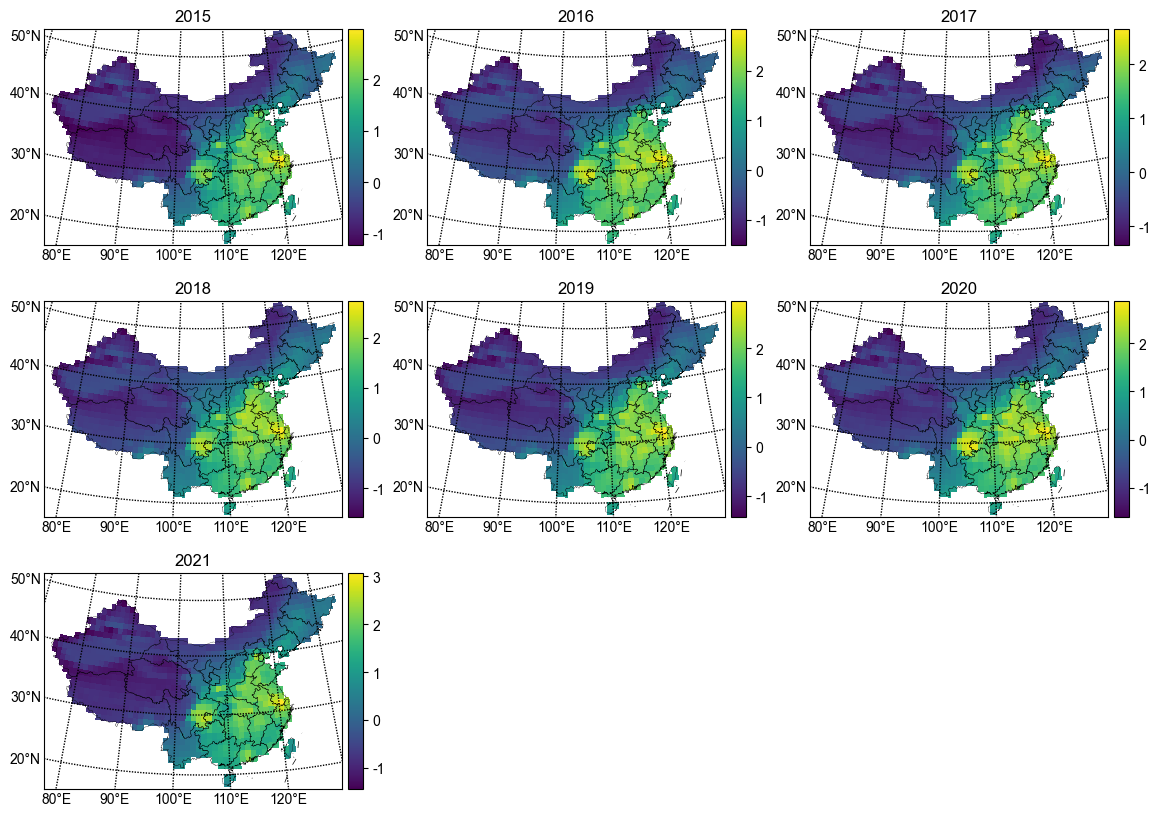

In [2]:
# 绘制测试
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sub = 331
for year in range(2015, 2022):
    plt.subplot(sub)
    map_plot_surface_sub(np.load(outPath + f"MappingXCO2_{year}.npy"), "viridis", None, None, f"{year}")
    sub += 1

# plt.savefig(outPath + "XCO2_anomaly.jpg", dpi=600, bbox_inches='tight')
plt.show()